x.shape= torch.Size([1000])


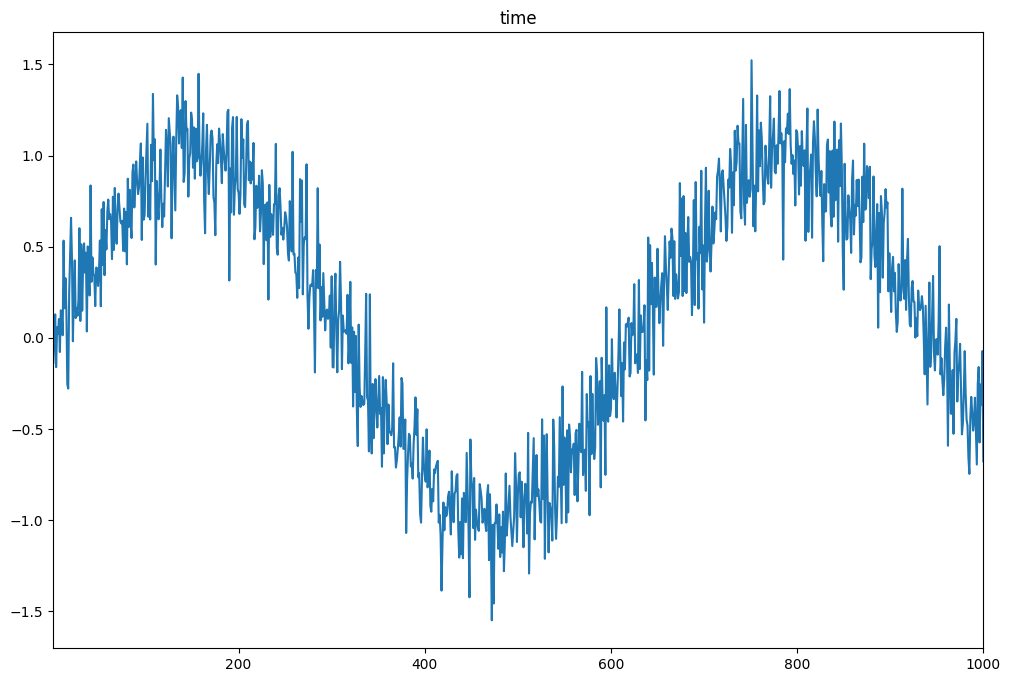

In [20]:
import torch
import torchvision
import matplotlib.pyplot as plt
T=1000
time=torch.arange(1,T+1,dtype=torch.float32)

x=torch.sin(0.01*time)+torch.normal(0,0.2,(T,))
print("x.shape=",x.shape)
plt.figure(figsize=(12,8))
plt.plot(time,x,'-')
plt.title("time")
plt.xlim([1,1000])
plt.show()
 


In [21]:
from torch import nn
import torch
T=1000


x=torch.sin(0.01*time)+torch.normal(0,0.2,(T,))
print("x.shape=",x.shape)
def init_weights(m):
    if type(m)==nn.Linear:
        nn.init.xavier_uniform_(m.weight)

def get_net():
    net=nn.Sequential(nn.Linear(4,10),
                      nn.ReLU(),
                      nn.Linear(10,1))
    net.apply(init_weights)
    return net
loss=nn.MSELoss(reduction='none')

tau=4
features=torch.zeros((T-tau,tau))
for i in range(tau):
    features[:,i]=x[i:T-tau+i]
labels=x[tau:].reshape((-1,1))
batch_size=16
n_train=600
from torch.utils.data import DataLoader,Dataset,TensorDataset


#print(features[:n_train].shape,labels[:n_train].shape)
train_dataset=TensorDataset(features[:n_train],labels[:n_train])
print("特征形状",features[:n_train].shape)
print("标签形状",labels[:n_train].shape)

train_iter=DataLoader(dataset=train_dataset,batch_size=batch_size)
net=get_net()
optimizer=torch.optim.Adam(net.parameters(),lr=1e-3)
for epoch in range(5):
    for x,y in train_iter:
        l=loss(net(x),y)
        l.sum().backward()
        optimizer.step()
        optimizer.zero_grad()
    print(f"第{epoch}轮的损失{l}")
import re,collections


x.shape= torch.Size([1000])
特征形状 torch.Size([600, 4])
标签形状 torch.Size([600, 1])
第0轮的损失tensor([[0.4749],
        [0.1501],
        [0.3031],
        [0.1211],
        [0.5599],
        [0.0289],
        [0.4250],
        [0.1429]], grad_fn=<MseLossBackward0>)
第1轮的损失tensor([[0.2391],
        [0.0590],
        [0.2085],
        [0.0745],
        [0.4618],
        [0.0041],
        [0.2644],
        [0.0560]], grad_fn=<MseLossBackward0>)
第2轮的损失tensor([[0.0974],
        [0.0140],
        [0.1443],
        [0.0440],
        [0.3838],
        [0.0007],
        [0.1700],
        [0.0124]], grad_fn=<MseLossBackward0>)
第3轮的损失tensor([[2.4995e-02],
        [1.6496e-04],
        [1.0081e-01],
        [2.2643e-02],
        [3.2350e-01],
        [1.1067e-02],
        [1.0821e-01],
        [1.2626e-05]], grad_fn=<MseLossBackward0>)
第4轮的损失tensor([[0.0005],
        [0.0068],
        [0.0700],
        [0.0088],
        [0.2803],
        [0.0285],
        [0.0698],
        [0.0085]], grad_fn=<MseLossBackw

word_counts defaultdict(<class 'int'>, {'ct': 1, 'gutenberg': 3, 'ebook': 6, 'of': 1165, 'the': 2289, 'time': 205, 'machine': 91, 'this': 154, 'is': 104, 'for': 217, 'use': 7, 'anyone': 3, 'anywhere': 2, 'in': 547, 'united': 3, 'states': 2, 'and': 1232, 'most': 29, 'other': 37, 'parts': 5, 'world': 35, 'at': 245, 'no': 94, 'cost': 1, 'with': 218, 'almost': 23, 'restrictions': 1, 'whatsoever': 1, 'you': 136, 'may': 33, 'copy': 1, 'it': 419, 'give': 5, 'away': 37, 'or': 83, 'reuse': 1, 'under': 34, 'terms': 3, 'project': 2, 'license': 1, 'included': 1, 'online': 1, 'wwwgutenbergorg': 1, 'if': 49, 'are': 49, 'not': 115, 'located': 2, 'will': 37, 'have': 122, 'to': 679, 'check': 1, 'laws': 1, 'country': 4, 'where': 30, 'before': 49, 'using': 1, 'title': 1, 'author': 1, 'h': 2, 'g': 2, 'wells': 10, 'release': 1, 'date': 4, 'october': 1, 'recently': 1, 'updated': 1, 'april': 1, 'language': 6, 'english': 3, 'start': 4, 'an': 86, 'invention': 2, 'by': 99, 'contents': 3, 'i': 1242, 'introductio

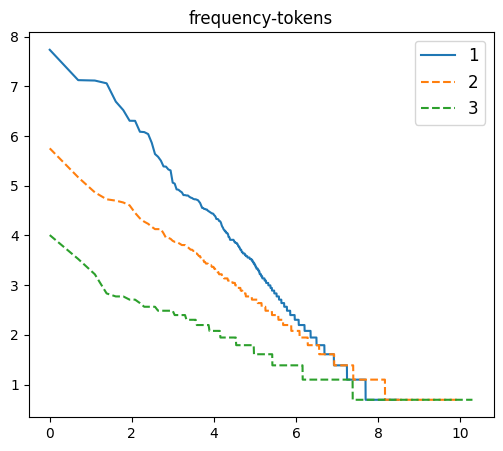

In [22]:
# 导入必要库：requests用于下载文本，re用于清洗，collections用于统计词频，torch用于后续张量处理（可选）

import re
from collections import defaultdict
import torch

# ------------------------------------------------------------------------------
# 1. 下载《时间机器》原文（来自Project Gutenberg公共领域库，ID=35，纯文本格式）
# ------------------------------------------------------------------------------
# 目标文本的下载链接（Project Gutenberg提供的纯文本UTF-8版本）
# time_machine_url = "https://www.gutenberg.org/cache/epub/35/pg35.txt"

# # 尝试下载文本，处理可能的网络错误
# try:
#     # 发送GET请求获取文本内容，timeout=10避免长时间等待
#     response = requests.get(time_machine_url, timeout=10)
#     # 验证请求是否成功（状态码200表示成功）
#     response.raise_for_status()
#     # 读取文本内容，指定编码为UTF-8（避免中文/特殊字符乱码）
#     raw_text = response.text
#     print("文本下载成功！")
# except requests.exceptions.RequestException as e:
#     # 若下载失败（如网络问题、链接失效），打印错误信息并退出
#     print(f"文本下载失败：{e}")
#     exit()

# ------------------------------------------------------------------------------
# 2. 提取正文：去除Project Gutenberg的版权声明、注释等无关内容
# ------------------------------------------------------------------------------
# Project Gutenberg文本结构：开头有版权声明，结尾有捐赠提示，正文从"CHAPTER I"开始，到"End of the Project Gutenberg EBook"结束
# 定位正文开始位置（忽略大小写，适配不同版本的"CHAPTER I"）
start_marker = "chapter i"
end_marker = "end of the project gutenberg ebook"

#raw_text=pd.read_csv(r'/home/PuMengYu/2025python/download/pg35.txt',encoding='utf-8')
with open(r'/home/PuMengYu/2025python/download/pg35.txt','r',encoding='utf-8') as f:

    lines=f.readlines()#读取所有的行
    raw_text=''.join(lines)
    


# 将原始文本转为小写，便于查找标记（但保留原始文本用于后续处理）
lower_text = raw_text.lower()
# 找到正文开始的索引（标记后加2个字符，跳过标记本身）
start_idx = lower_text.find(start_marker) + len(start_marker) + 2
# 找到正文结束的索引（从结束标记开始截断）
end_idx = lower_text.find(end_marker)

# 提取核心正文部分，去除前后多余空格/换行
main_text = raw_text[start_idx:end_idx].strip()

# ------------------------------------------------------------------------------
# 3. 文本清洗：统一格式、去除特殊字符
# ------------------------------------------------------------------------------
# 将正文按换行符分割成列表（每行一个元素），便于逐行处理
lines = main_text.splitlines()

# 过滤空行（去除纯换行的无效行）
non_empty_lines = [line for line in lines if line.strip() != ""]

# 清洗每行文本：1.保留字母和空格 2.转为小写（统一格式，避免"The"和"the"被当作不同词）
# re.sub(r'[^a-zA-Z\s]', '', line)：用正则替换非字母/非空格的字符为空（即删除特殊符号、数字等）
# .lower()：转为小写
#cleaned_lines = [re.sub(r'[^a-zA-Z\s]', '', line).lower() for line in non_empty_lines]
cleaned_lines=[]

for line in non_empty_lines:
    x=re.sub(r'[^a-zA-Z\s]','',line).lower()
    cleaned_lines.append(x)
# ------------------------------------------------------------------------------
# 4. 分词：将清洗后的文本按单词拆分（基础单词级分词）
# ------------------------------------------------------------------------------
# 对每行文本按空格分割，得到单词列表（如"the time machine" → ["the", "time", "machine"]）
# 过滤空字符串（避免分割后产生空元素）

#tokens = [word for line in cleaned_lines for word in line.split() if word.strip() != ""]
#cleaned_lines清洗后的文本

tokens=[]
for line in cleaned_lines:
    for word in line.split():
        if word.strip()!="":
            tokens.append(word)
#tokens是清除了空格后的，按照顺序，所有单词的组合,每个单词没有频数

# 注：若需更精细的分词（如处理连字符"time-machine"），可改用nltk/spacy，此处用基础分割便于理解

# ------------------------------------------------------------------------------
# 5. 构建词表：将单词映射为数字索引（模型只能处理数值，无法直接处理字符串）
# ------------------------------------------------------------------------------
# 步骤1：统计每个单词的出现频率（高频词优先分配小索引，节省存储和计算）
word_counts = defaultdict(int)  # defaultdict默认值为0，无需手动初始化
for word in tokens:
    word_counts[word] += 1  # 每出现一次，词频+1
print("word_counts",word_counts)
#word_counts,是单词：频数的组合，按照顺序，不按照升序或者降序
#word是字符串，
# 步骤2：初始化词表，添加"未知词元"<unk>（处理未来可能遇到的、未在词表中的单词）
vocab = {"<unk>": 0}  # <unk>的索引固定为0

# 步骤3：按词频从高到低排序，为每个单词分配唯一索引（索引从1开始递增）
# sorted(word_counts.items(), key=lambda x: -x[1])：按词频（x[1]）降序排序，-表示降序
for word, count in sorted(word_counts.items(), key=lambda x: -x[1]):
    vocab[word] = len(vocab)  # len(vocab)随添加自动递增，确保索引唯一
print("vocab=",vocab)
#vocab是增加了"<unk>"的单词和其索引，按照频数从大到小，给予索引1，2，3，4,vocab所有单词都来自main_text

# ------------------------------------------------------------------------------
# 6. 文本转索引：将原始单词序列转为数字序列（模型输入格式）
# ------------------------------------------------------------------------------
# 遍历每个单词，若在词表中则取其索引，否则用<unk>的索引0（处理未登录词）
#corpus = [vocab[word] if word in vocab else vocab["<unk>"] for word in tokens]
#corpus是把tokens所有单词都换成对应的索引，然后用一个列表表示，0表示"<unk>"也就是unknown,
corpus=[]
for word in tokens:
    if word in vocab:
        corpus.append(vocab[word])
    else:
        corpus.append(vocab['<unk>'])
# ------------------------------------------------------------------------------
# 7. 验证预处理结果（打印关键信息，确认流程正确）
# ------------------------------------------------------------------------------
#分为三个tokens,vocab,corpus这里的tokens是原始文本分词后的结果,vocab是单词的词表,是字典，对应索引。
#corpus是原始文本索引转换后的结果,是列表,tokens是列表
print(f"1. 正文总单词数：{len(tokens)}")  # 查看分词后的总单词量
print(f"2. 词表大小（不重复单词数+<unk>）：{len(vocab)}")  # 查看词表规模
print(f"3. 前10个单词：{tokens[:10]}")  # 查看原始分词结果
print(f"4. 前10个单词对应的索引：{corpus[:10]}")  # 查看索引转换结果
print(f"5. 高频词示例（前5个）：{list(vocab.items())[:6]}")  # 查看前5个高频词及其索引（含<unk>）
print(list(vocab.items())[:10])
print(type(vocab))
print(type(corpus))
print(type(tokens))
print(type(word_counts))


print(word_counts)
print(word_counts["the"])
a=word_counts.get("the",0)
print("a=",a)
freq=[]
for word,count in sorted(word_counts.items(),key=lambda x:-x[1]):
    freq.append(count)
import matplotlib.pyplot as plt

l=len(freq)
import numpy as np

#二元语法和三元语法
def ngrams(tokens,n):
    y=[]
    for i in range(len(tokens)-n+1):
       a=tuple(tokens[i:i+n])
       y.append(a)
    return y
def count_ngrams(tokens,n):
    y=ngrams(tokens,n)
    frequency=defaultdict(int)
    for i in y:
        frequency[i]+=1
    return frequency
         
        
frd2=count_ngrams(tokens,2)
frd3=count_ngrams(tokens,3)
fr2=[]
fr3=[]
for d in sorted(frd2.values(),key=lambda x:-x):
    fr2.append(d)
for d in sorted(frd3.values(),key=lambda x:-x):
    fr3.append(d)
x2=torch.arange(len(fr2))
x3=torch.arange(len(fr3))
x=torch.arange(l)
plt.figure(figsize=(6,5))
x=torch.log1p(x)
x2=torch.log1p(x2)
x3=torch.log1p(x3)
fr2=torch.tensor(fr2)
fr3=torch.tensor(fr3)
fr3=torch.log1p(fr3)
fr2=torch.log1p(fr2)
freq=torch.tensor(freq)
freq=torch.log1p(freq)
plt.plot(x,freq,'-',label='1')

plt.plot(x2,fr2,'--',label='2')

plt.plot(x3,fr3,'--',label='3')
plt.legend(fontsize=12)
plt.title("frequency-tokens")
plt.show()

In [23]:
import random,torch
def seq_data_iter_random(corpus,batch_size,num_steps):
    """使用随机抽样生成一个小批量的子序列"""
    corpus=corpus[random.randint(0,num_steps-1):]
    #从0到num_steps-1之间随机抽取一个整数
    
    num_subseqs=(len(corpus)-1)//num_steps
    
    initial_indices=list(range(0,num_subseqs*num_steps,num_steps))
    
    random.shuffle(initial_indices)
    
    def data(pos):
        #返回从pos位置开始的长度为num_steps的序列
        return corpus[pos:pos+num_steps]
    
    num_batches=num_subseqs//batch_size
    for i in range(0,batch_size*num_batches,batch_size):
        #在这里，initial_indice包含子序列的随机起始索引
        initial_indices_per_batch=initial_indices[i:i+batch_size]
        x=[data(j) for j in initial_indices_per_batch]
        
        y=[data(j+1) for j in initial_indices_per_batch]
        
        yield torch.tensor(x),torch.tensor(y)
my_seq=list(range(35))
corpus=my_seq
batch_size=2
num_steps=5
a=random.randint(0,num_steps-1)
print("a=",a)
corpus=corpus[a:]
 
num_subseqs=(len(corpus)-1)//num_steps
print("num_subseqs=",num_subseqs)  
initial_indices=list(range(0,num_subseqs*num_steps,num_steps))
 #每次词语的起点   
random.shuffle(initial_indices)
    
def data(pos):
        #返回从pos位置开始的长度为num_steps的序列
    return corpus[pos:pos+num_steps]
#nun_subseqs,是这个语句被分成多少段
#我们要在batch_size里面处理完毕，那么每一批次要处理多少句语言就是num_batches  
#相当于两批次，一次3句话，一句话5个单词  
num_batches=num_subseqs//batch_size
for i in range(0,batch_size*num_batches,batch_size):
        #在这里，initial_indice包含子序列的随机起始索引
        initial_indices_per_batch=initial_indices[i:i+batch_size]
        x=[data(j) for j in initial_indices_per_batch]
        
        y=[data(j+1) for j in initial_indices_per_batch]



my_seq=list(range(35))
for x,y in seq_data_iter_random(my_seq,batch_size=2,num_steps=5):
    print("x:",x,'\n y:',y)
def seq_data_iter_sequential(corpus,batch_size=2,num_steps=5):
    offset=random.randint(0,num_steps)
    num_tokens=len(corpus)-offset-1
    num_tokens=(num_tokens//batch_size)*batch_size
    x=corpus[offset:offset+num_tokens]
    y=corpus[offset+1:offset+num_tokens+1]
    x=torch.tensor(x)
    y=torch.tensor(y)
    x=x.reshape(batch_size,-1)
    y=y.reshape(batch_size,-1)
    num_batches=x.shape[1]//num_steps
    for i in range(0,num_steps*num_batches,num_steps):
        x1=x[:,i:i+num_steps]
        y1=y[:,i:i+num_steps]
        yield x1,y1
for x,y in seq_data_iter_sequential(my_seq,batch_size=2,num_steps=5):
    print("x:",x,"\n y:",y)



# 序列数据迭代相关代码
def seq_data_iter_sequential(corpus, batch_size, num_steps):
    num_batches = (len(corpus) - 1) // (batch_size * num_steps)
    xs = corpus[:num_batches * batch_size * num_steps]
    ys = corpus[1:num_batches * batch_size * num_steps + 1]
    xs=torch.tensor(xs)
    ys=torch.tensor(ys)
    xs = xs.reshape(batch_size, -1)
    ys = ys.reshape(batch_size, -1)
    num_epochs = num_batches // num_steps
    for i in range(num_epochs):
        x = xs[:, i * num_steps: (i + 1) * num_steps]
        y = ys[:, i * num_steps: (i + 1) * num_steps]
        yield x, y

# 迭代打印示例
for X, Y in seq_data_iter_sequential(my_seq, batch_size=2, num_steps=5):
    print('X: ', X, '\nY:', Y)



# 数据迭代器类
# class SeqDataLoader:  #@save
#     """加载序列数据的迭代器"""
#     def __init__(self, batch_size, num_steps, use_random_iter, max_tokens):
#         if use_random_iter:
#             self.data_iter_fn = seq_data_iter_random
#         else:
#             self.data_iter_fn = seq_data_iter_sequential
#         self.corpus, self.vocab = load_corpus_time_machine(max_tokens)
#         self.batch_size, self.num_steps = batch_size, num_steps

#     def __iter__(self):
#         return self.data_iter_fn(self.corpus, self.batch_size, self.num_steps)

# # 加载时光机器数据集函数
# def load_data_time_machine(batch_size, num_steps, #@save
#                            use_random_iter=False, max_tokens=10000):
#     """返回时光机器数据集的迭代器和词表"""
#     data_iter = SeqDataLoader(
#         batch_size, num_steps, use_random_iter, max_tokens)
#     return data_iter, data_iter.vocab

a= 1
num_subseqs= 6
x: tensor([[ 9, 10, 11, 12, 13],
        [29, 30, 31, 32, 33]]) 
 y: tensor([[10, 11, 12, 13, 14],
        [30, 31, 32, 33, 34]])
x: tensor([[ 4,  5,  6,  7,  8],
        [14, 15, 16, 17, 18]]) 
 y: tensor([[ 5,  6,  7,  8,  9],
        [15, 16, 17, 18, 19]])
x: tensor([[24, 25, 26, 27, 28],
        [19, 20, 21, 22, 23]]) 
 y: tensor([[25, 26, 27, 28, 29],
        [20, 21, 22, 23, 24]])
x: tensor([[ 5,  6,  7,  8,  9],
        [19, 20, 21, 22, 23]]) 
 y: tensor([[ 6,  7,  8,  9, 10],
        [20, 21, 22, 23, 24]])
x: tensor([[10, 11, 12, 13, 14],
        [24, 25, 26, 27, 28]]) 
 y: tensor([[11, 12, 13, 14, 15],
        [25, 26, 27, 28, 29]])


**用豆包生成的较为完整的代码**

In [24]:
import random
import torch
import re
import urllib.request  # 用于下载文本数据
from collections import Counter

# 1. 加载并预处理时光机器数据集
def load_corpus_time_machine(max_tokens=10000):
    """
    加载时光机器文本，预处理并构建词表
    """
    # 从网络下载时光机器文本
    # url = "http://www.gutenberg.org/ebooks/35.txt.utf-8"
    # try:
    #     with urllib.request.urlopen(url) as f:
    #         text = f.read().decode('utf-8')
    with open(r"/home/PuMengYu/2025python/download/pg35.txt",encoding='utf-8') as f:
        text=f.read()

    # 文本预处理
    text = text.lower()  # 转为小写
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # 只保留字母和空格
    text = re.sub(r'\s+', ' ', text).strip()  # 合并多个空格为一个
    tokens = list(text)  # 字符级分词
    
    # 构建词表
    class Vocab:
        def __init__(self, tokens, min_freq=1):
            self.token_freqs = Counter(tokens)
            self.token_freqs = sorted(self.token_freqs.items(), 
                                     key=lambda x: x[1], reverse=True)
            
            # 构建映射关系
            self.itos = ['<unk>']  # 索引到字符
            self.stoi = {'<unk>': 0}  # 字符到索引
            
            for token, freq in self.token_freqs:
                if freq >= min_freq:
                    self.itos.append(token)
                    self.stoi[token] = len(self.itos) - 1
        
        def __len__(self):
            return len(self.itos)
        
        def __getitem__(self, tokens):
            if not isinstance(tokens, (list, tuple)):
                return self.stoi.get(tokens, self.stoi['<unk>'])
            return [self.__getitem__(token) for token in tokens]
    
    vocab = Vocab(tokens)
    # 将文本转换为索引序列
    corpus = [vocab[token] for token in tokens[:max_tokens]]
    return torch.tensor(corpus), vocab

# 2. 随机抽样迭代器
def seq_data_iter_random(corpus, batch_size, num_steps):
    """使用随机抽样生成批量子序列"""
    corpus = corpus[random.randint(0, num_steps - 1):]
    num_subseqs = (len(corpus) - 1) // num_steps
    initial_indices = list(range(0, num_subseqs * num_steps, num_steps))
    random.shuffle(initial_indices)
    
    def data(pos):
        return corpus[pos:pos + num_steps]
    
    num_batches = num_subseqs // batch_size
    for i in range(0, batch_size * num_batches, batch_size):
        initial_indices_per_batch = initial_indices[i:i + batch_size]
        x = [data(j) for j in initial_indices_per_batch]
        y = [data(j + 1) for j in initial_indices_per_batch]
        yield torch.tensor(x), torch.tensor(y)

# 3. 顺序抽样迭代器
def seq_data_iter_sequential(corpus, batch_size, num_steps):
    """使用顺序抽样生成批量子序列"""
    offset = random.randint(0, num_steps)
    num_tokens = len(corpus) - offset - 1
    num_tokens = (num_tokens // batch_size) * batch_size
    
    x = corpus[offset:offset + num_tokens]
    y = corpus[offset + 1:offset + num_tokens + 1]
    
    x = x.reshape(batch_size, -1)
    y = y.reshape(batch_size, -1)
    
    num_batches = x.shape[1] // num_steps
    for i in range(0, num_batches * num_steps, num_steps):
        x_batch = x[:, i:i + num_steps]
        y_batch = y[:, i:i + num_steps]
        yield x_batch, y_batch

# 4. 数据加载器类
class SeqDataLoader:
    """加载序列数据的迭代器"""
    def __init__(self, batch_size, num_steps, use_random_iter, max_tokens):
        if use_random_iter:
            self.data_iter_fn = seq_data_iter_random
        else:
            self.data_iter_fn = seq_data_iter_sequential
        self.corpus, self.vocab = load_corpus_time_machine(max_tokens)
        self.batch_size, self.num_steps = batch_size, num_steps

    def __iter__(self):
        return self.data_iter_fn(self.corpus, self.batch_size, self.num_steps)

# 5. 数据加载函数
def load_data_time_machine(batch_size, num_steps, use_random_iter=False, max_tokens=10000):
    """返回时光机器数据集的迭代器和词表"""
    data_iter = SeqDataLoader(batch_size, num_steps, use_random_iter, max_tokens)
    return data_iter, data_iter.vocab

# 测试代码
if __name__ == "__main__":
    # 测试数据加载
    batch_size = 2
    num_steps = 5
    data_iter, vocab = load_data_time_machine(batch_size, num_steps, use_random_iter=False)
    
    print(f"词表大小: {len(vocab)}")
    print(f"前10个字符: {vocab.itos[:10]}")
    
    # 打印第一批数据
    for X, Y in data_iter:
        print("\n输入序列X:")
        print(X)
        print("目标序列Y:")
        print(Y)
        break


词表大小: 28
前10个字符: ['<unk>', ' ', 'e', 't', 'a', 'i', 'o', 'n', 's', 'r']

输入序列X:
tensor([[10,  2,  1, 20,  9],
        [ 3,  9,  6,  8, 20]])
目标序列Y:
tensor([[ 2,  1, 20,  9,  6],
        [ 9,  6,  8, 20,  2]])


**循环神经网络**,**公式：**,$H_t=\phi(X_tW_{xh}+H_{t-1}W_{hh}+b_h)$,$O_t=H_tW_{hq}+b_q$,

$W_{xh}\in R^{d\times h},X_t\in R^{n\times d},W_{hh}\in R^{h\times h},b_h\in R^{1\times h},H_t\in R^{n\times h},W_{hq}\in R^{h\times q},b_q\in R^{1\times q},O_t\in R^{n\times q}$

In [28]:
def get_params(vocab_size, num_hiddens, device):
    # 输入和输出维度均等于词表大小（因为语言模型中输入输出来自同一词表）
    num_inputs = num_outputs = vocab_size

    # 定义参数初始化函数：生成正态分布随机数并缩放（0.01是为了让初始参数较小，利于训练）
    def normal(shape):
        return torch.randn(size=shape, device=device) * 0.01

    # 隐藏层参数
    # 输入到隐藏层的权重矩阵：将输入词向量映射到隐藏层
    W_xh = normal((num_inputs, num_hiddens))
    # 隐藏层到隐藏层的权重矩阵：传递上一时刻隐藏状态到当前时刻，体现“循环”特性
    W_hh = normal((num_hiddens, num_hiddens))
    # 隐藏层偏置项，初始化为0
    b_h = torch.zeros(num_hiddens, device=device)

    # 输出层参数
    # 隐藏层到输出层的权重矩阵：将隐藏层表示映射到词表空间
    W_hq = normal((num_hiddens, num_outputs))
    # 输出层偏置项，初始化为0
    b_q = torch.zeros(num_outputs, device=device)

    # 收集所有参数
    params = [W_xh, W_hh, b_h, W_hq, b_q]
    # 标记参数需要计算梯度（用于反向传播更新）
    for param in params:
        param.requires_grad_(True)
    # 返回初始化好的参数列表
    return params
from typing import Tuple #这个是类型注解，是给及其看的，
def init_rnn_state(batch_size, num_hiddens, device='cpu')->Tuple[torch.tensor]:
    """
    初始化循环神经网络的隐藏状态。
    
    参数：
          batch_size(int):批量大小
    
    返回：
        tuple:包含一个形状为(batch_size,num_hiddens)的零张量的元组，用于初始化RNN的隐藏状态
              
    
    """
    return (torch.zeros((batch_size, num_hiddens), device=device), )
devide='cpu'
a=init_rnn_state(2,10)
print("init_rnn_state",a)
def rnn(inputs, state, params):
    # inputs的形状是(时间步数量, 批量大小, 词表大小)
    W_xh, W_hh, b_h, W_hq, b_q = params
    H, = state
    outputs = []
    # X的形状是(批量大小, 词表大小)
    for X in inputs:
        H = torch.tanh(torch.mm(X, W_xh) + torch.mm(H, W_hh) + b_h)
        Y = torch.mm(H, W_hq) + b_q
        outputs.append(Y)
    return torch.cat(outputs, dim=0), (H,)
from torch.nn import functional as F
class RNNModelScratch:
    """从零开始实现的循环神经网络模型"""
    def __init__(self, vocab_size, num_hiddens, 
                 get_params, init_state, forward_fn,device='cpu'):
        self.vocab_size, self.num_hiddens = vocab_size, num_hiddens
        self.params = get_params(vocab_size, num_hiddens, device)
        self.init_state, self.forward_fn = init_state, forward_fn
#这里的__call__
    def __call__(self, X, state):
        X = F.one_hot(X.T.type(torch.long), self.vocab_size).type(torch.float32)
        return self.forward_fn(X, state, self.params)

    def begin_state(self, batch_size, device='cpu'):
        return self.init_state(batch_size, self.num_hiddens, device)



#检查输出形状示例
def try_gpu():
    #a=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    if torch.cuda.is_available():
        a='cuda'
    else:
        a='cpu'
    return torch.device(a)
num_hiddens = 512
print("num_hiddens=",num_hiddens,'len(vocab)=',len(vocab))

net = RNNModelScratch(len(vocab), num_hiddens, get_params,
                      init_rnn_state, rnn,device='cpu')
state = net.begin_state(X.shape[0])
Y, new_state = net(X.to('cpu'), state)
Y.shape, len(new_state), new_state[0].shape
print("x",X)
# # 输出：(torch.Size([10, 201]), 1, torch.Size([2, 512]))
#梯度截断，

init_rnn_state (tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),)
num_hiddens= 512 len(vocab)= 28
x tensor([[10,  2,  1, 20,  9],
        [ 3,  9,  6,  8, 20]])


**梯度截断**，$g\leftarrow \min\{1,\frac{\xi}{\|g\|}\}g$

In [37]:
import math
import time
import torch
from torch import nn
from torch.optim import SGD

def grad_clipping(net,theta):
    """截断梯度"""
    if isinstance(net,nn.Module):
        #net.parameters里面所有需要计算 梯度的组成了list名为params
        params=[p for p in net.parameters() if p.requires_grad]
    else:
        params=net.params
    norm=torch.sqrt(sum(torch.sum((p.grad**2)) for p in params))
    if norm>theta:
        for param in params:
            param.grad[:]*=theta/norm

print("调试开始")
# ========== 替换 d2l.Timer ==========
class Timer:
    def __init__(self):
        self.start()
    def start(self):
        self.begin = time.time()
    def stop(self):
        return time.time() - self.begin

# ========== 替换 d2l.Accumulator ==========
class Accumulator:
    def __init__(self, n):
        self.data = [0.0] * n
    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]
    def __getitem__(self, idx):
        return self.data[idx]

# ========== 替换 d2l.grad_clipping ==========


#Timer,Accumulator,grad_clipping,prdeict_ch8



# ========== 替换 d2l.predict_ch8 ==========
def predict_ch8(prefix, num_preds, net, vocab, device):
    """根据前缀生成后续词（文本生成）"""
    # 前缀转成词索引
    prefix_tokens = [vocab.token_to_idx[token] for token in prefix.split()]
    # 初始化隐藏状态
    state = net.begin_state(batch_size=1, device=device)
    # 预热：用前缀更新隐藏状态
    for token in prefix_tokens:
        _, state = net(torch.tensor([[token]], device=device), state)
    output = prefix_tokens
    # 生成后续num_preds个词
    for _ in range(num_preds):
        y, state = net(torch.tensor([[output[-1]]], device=device), state)
        next_token = y.argmax(dim=1).item()
        output.append(next_token)
    # 索引转成词，拼接成文本
    return ' '.join([vocab.idx_to_token[idx] for idx in output])

def train_epoch_ch8(net, train_iter, loss, updater, device, use_random_iter):
    """单轮训练逻辑（替换d2l.train_epoch_ch8）"""
    state, timer = None, Timer()
    metric = Accumulator(2)  # 存储：总损失、总词元数
    for X, Y in train_iter:
        # 初始化/重置隐藏状态
        print(f"X 原始形状: {X.shape} (B={X.shape[0]}, T_x={X.shape[1]})")
        print(f"Y 原始形状: {Y.shape} (B={Y.shape[0]}, T_y={Y.shape[1]})")
        if state is None or use_random_iter:
            state = net.begin_state(batch_size=X.shape[0], device=device)
        else:
            # 分离隐藏状态的梯度（避免梯度回溯到历史批次）
            if isinstance(net, nn.Module) and not isinstance(state, tuple):
                state.detach_()
            else:
                for s in state:
                    s.detach_()
        # 调整标签形状 & 数据入设备
        y = Y.T.reshape(-1)
        print(f"处理后 y 形状: {y.shape} (T_y×B={y.numel()})")
        
        X, y = X.to(device), y.to(device)
        # 前向传播
        y_hat, state = net(X, state)
        
        print(f"模型输出 y_hat 形状: {y_hat.shape} (样本数={y_hat.shape[0]})")
        print("-"*50)
        
        l = loss(y_hat, y.long()).mean()
        # 反向传播 + 参数更新
        if isinstance(updater, torch.optim.Optimizer):
            updater.zero_grad()
            l.backward()
            grad_clipping(net, 1)  # 梯度裁剪
            updater.step()
        else:
            l.backward()
            grad_clipping(net, 1)
            updater(batch_size=1)  # 自定义优化器的更新逻辑（需与实际匹配）
        # 累加损失和词元数
        metric.add(l * y.numel(), y.numel())
    # 计算困惑度（perplexity）和训练速度
    ppl = math.exp(metric[0] / metric[1])
    speed = metric[1] / timer.stop()
    return ppl, speed

def train_ch8(net, train_iter, vocab, lr, num_epochs, device, use_random_iter=False):
    """多轮训练逻辑（替换d2l.train_ch8）"""
    loss = nn.CrossEntropyLoss()
    # 初始化优化器（支持PyTorch优化器或自定义优化器）
    if isinstance(net, nn.Module):
        updater = SGD(net.parameters(), lr=lr)
    else:
        # 若为自定义模型，需实现类似如下的SGD更新（示例）
        def custom_sgd_updater(batch_size):
            for param in net.params:  # 假设自定义模型有`params`属性存储可训练参数
                param.data -= lr * param.grad / batch_size
        updater = custom_sgd_updater
    # 多轮训练循环
    for epoch in range(num_epochs):
        ppl, speed = train_epoch_ch8(net, train_iter, loss, updater, device, use_random_iter)
        # 每10轮打印一次训练进度和生成文本
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1} | Perplexity: {ppl:.2f} | Speed: {speed:.2f} tokens/sec")
            print(predict_ch8("time traveller", 50, net, vocab, device) + "\n")
    # 打印最终结果
    print(f"Final Perplexity: {ppl:.2f} | Speed: {speed:.2f} tokens/sec on {device}")
    print("Generated text (prefix 'time traveller'):\n", 
          predict_ch8("time traveller", 50, net, vocab, device))
    print("Generated text (prefix 'traveller'):\n", 
          predict_ch8("traveller", 50, net, vocab, device))
num_epochs,lr=500,1
train_ch8(net,train_iter,vocab,lr,num_epochs,device='cpu')


调试开始
X 原始形状: torch.Size([16, 4]) (B=16, T_x=4)
Y 原始形状: torch.Size([16, 1]) (B=16, T_y=1)
处理后 y 形状: torch.Size([16]) (T_y×B=16)
模型输出 y_hat 形状: torch.Size([64, 28]) (样本数=64)
--------------------------------------------------


ValueError: Expected input batch_size (64) to match target batch_size (16).